In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bitcoin price prediction

In [1]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/data/BTC-USD.csv')

In [65]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400
...,...,...,...,...,...,...,...
1457,2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,18264.992188,25547132265
1458,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985
1459,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802
1460,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637


In [66]:
train = df.iloc[0:int(len(df)*0.8),:]
test = df.iloc[int(len(df)*0.8):,:]

In [67]:
train.shape

(1169, 7)

In [68]:
test.shape

(293, 7)

In [69]:
X_train = []
Y_train = []
for i in range(0,len(train)-3):
  x = train.iloc[i:(i+3),4]
  y = train.iloc[i+3,4]
  X_train.append(x)
  Y_train.append(y)

In [70]:
X_train

[0    781.481018
 1    778.088013
 2    784.906982
 Name: Close, dtype: float64,
 1    778.088013
 2    784.906982
 3    790.828979
 Name: Close, dtype: float64,
 2    784.906982
 3    790.828979
 4    790.530029
 Name: Close, dtype: float64,
 3    790.828979
 4    790.530029
 5    792.713989
 Name: Close, dtype: float64,
 4    790.530029
 5    792.713989
 6    800.875977
 Name: Close, dtype: float64,
 5    792.713989
 6    800.875977
 7    834.281006
 Name: Close, dtype: float64,
 6    800.875977
 7    834.281006
 8    864.539978
 Name: Close, dtype: float64,
 7    834.281006
 8    864.539978
 9    921.984009
 Name: Close, dtype: float64,
 8     864.539978
 9     921.984009
 10    898.822021
 Name: Close, dtype: float64,
 9     921.984009
 10    898.822021
 11    896.182983
 Name: Close, dtype: float64,
 10    898.822021
 11    896.182983
 12    907.609985
 Name: Close, dtype: float64,
 11    896.182983
 12    907.609985
 13    933.197998
 Name: Close, dtype: float64,
 12    907.60998

In [71]:
pd.DataFrame(Y_train, columns=['close final'])

,close final
0,790.828979
1,790.530029
2,792.713989
3,800.875977
4,834.281006
...,...
1161,9686.441406
1162,9663.181641
1163,9924.515625
1164,9650.174805


In [72]:
type(X_train)

list

In [73]:
X_test = []
Y_test = []
# 3 dena nanazad
for i in range(0,len(test)-3):
  x = test.iloc[i:(i+3),4]
  y = test.iloc[i+3,4]
  X_test.append(x)
  Y_test.append(y)

# LSTM model

In [74]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [75]:
X_train

array([[ 781.481018,  778.088013,  784.906982],
       [ 778.088013,  784.906982,  790.828979],
       [ 784.906982,  790.828979,  790.530029],
       ...,
       [9608.475586, 9686.441406, 9663.181641],
       [9686.441406, 9663.181641, 9924.515625],
       [9663.181641, 9924.515625, 9650.174805]])

In [76]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [77]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [78]:
model = Sequential()

In [79]:
model.add(LSTM(100,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))

In [80]:
model.add(LSTM(64,activation='relu'))

In [81]:
model.add(Dense(1, activation='linear'))

In [82]:
model.compile(loss='mse', optimizer='adam')

In [83]:
history = model.fit(X_train,Y_train,epochs=30, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/30
15/15 - 5s - loss: 44117468.0000 - val_loss: 77034088.0000 - 5s/epoch - 350ms/step
Epoch 2/30
15/15 - 0s - loss: 39463296.0000 - val_loss: 68542608.0000 - 117ms/epoch - 8ms/step
Epoch 3/30
15/15 - 0s - loss: 33651776.0000 - val_loss: 55270408.0000 - 130ms/epoch - 9ms/step
Epoch 4/30
15/15 - 0s - loss: 25600534.0000 - val_loss: 38017472.0000 - 133ms/epoch - 9ms/step
Epoch 5/30
15/15 - 0s - loss: 14758932.0000 - val_loss: 16965266.0000 - 110ms/epoch - 7ms/step
Epoch 6/30
15/15 - 0s - loss: 5248313.0000 - val_loss: 3347632.5000 - 111ms/epoch - 7ms/step
Epoch 7/30
15/15 - 0s - loss: 662669.4375 - val_loss: 130041.8750 - 98ms/epoch - 7ms/step
Epoch 8/30
15/15 - 0s - loss: 265776.6562 - val_loss: 298050.4688 - 126ms/epoch - 8ms/step
Epoch 9/30
15/15 - 0s - loss: 256283.7969 - val_loss: 149385.3906 - 104ms/epoch - 7ms/step
Epoch 10/30
15/15 - 0s - loss: 207234.2969 - val_loss: 129920.7500 - 102ms/epoch - 7ms/step
Epoch 11/30
15/15 - 0s - loss: 207699.4062 - val_loss: 129292.2500 - 

In [203]:
import matplotlib.pyplot as plt

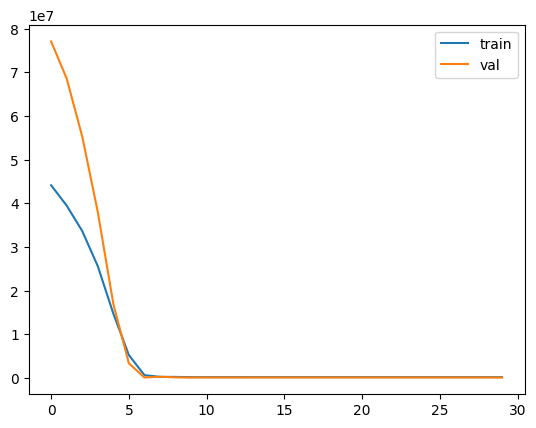

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [84]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [85]:
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 4ms/step


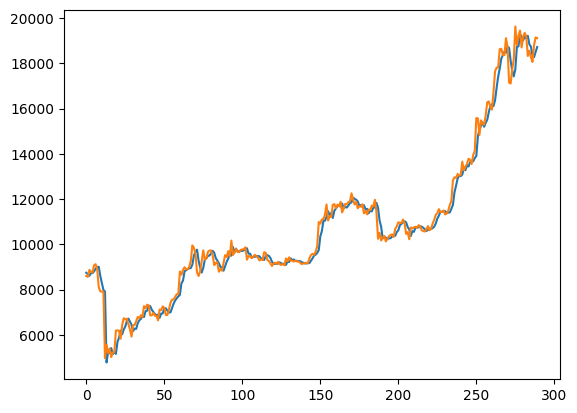

In [88]:
plt.plot(y_pred,label='predict')
plt.plot(Y_test,label='test')

In [89]:
from sklearn.metrics import r2_score

In [91]:
r2_score(Y_test,y_pred)

0.9835803609766052

# CNN & LSTM for sentiment analysis
Sentiment analysis of bitcoin tweets

In [157]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/data/bitcointweets.csv')

In [158]:
df

,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,5673,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,372,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,557,0,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,3,0,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [159]:
df.columns = ['date', 'text', 'author', 'id', 'unknown', 'tags', 'url', 'sentiment']

In [160]:
df

,date,text,author,id,unknown,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,5673,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,372,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,557,0,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,3,0,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [161]:
df.drop(['id','unknown'],axis=1,inplace=True)

In [162]:
df

,date,text,author,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [163]:
df.sentiment.value_counts()

sentiment
['positive']    22937
['neutral']     21938
['negative']     5983
Name: count, dtype: int64

In [164]:
import seaborn as sns

<Axes: xlabel='count', ylabel='sentiment'>

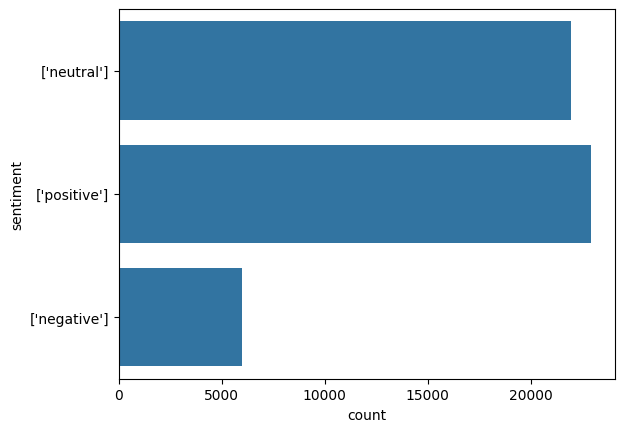

In [165]:
sns.countplot(df['sentiment'])

In [166]:
df['text_length'] = df['text'].apply(len)

In [167]:
df

,date,text,author,tags,url,sentiment,text_length
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],137
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],34
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],146
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],138
...,...,...,...,...,...,...,...
50853,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50854,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],140
50855,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],140
50856,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],121


<Axes: >

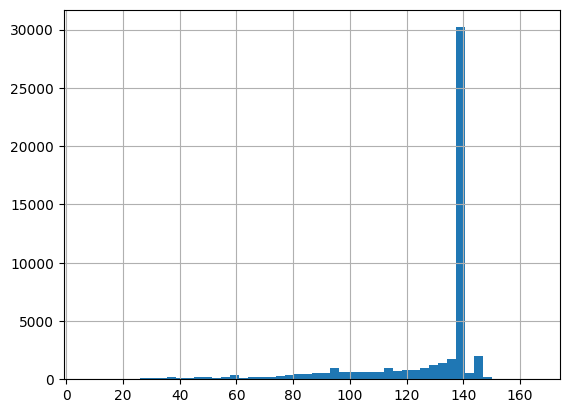

In [168]:
df['text_length'].hist(bins=50)

In [169]:
#y = pd.get_dummies(df['sentiment'])

In [170]:
y = pd.get_dummies(df['sentiment']).astype(int)

In [171]:
y

,['negative'],['neutral'],['positive']
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
50853,0,0,1
50854,0,0,1
50855,0,1,0
50856,0,0,1


In [172]:
x = df['text']

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [175]:
X_train

23592    RT @bethereumteam: This month we're celebratin...
43687    RT @amonwallet: Join us in Telegram! Click thi...
9605     #cashmoneyrecords How do I get bitcoin money? ...
45451    RT @nfrisbie83: OK Internet... I need your hel...
22540    Join the Rupee contest... \n\n#RupeeAwareness ...
                               ...                        
28348    Upbit Launches South Korea's First Cryptocurre...
24484    Earn free bitcoin with our little BTC miners h...
13005    RT @UTEMISUTS: Decentralizing businesses reput...
38296    Here's your chance to get 1700 #RamenCoin from...
2457     Mine your own bitcoin while you browse  https:...
Name: text, Length: 40686, dtype: object

tekst ---> vektor

In [176]:
from keras.preprocessing.text import Tokenizer

In [177]:
tokenizer = Tokenizer(num_words=10000)

In [178]:
tokenizer.fit_on_texts(X_train)

In [179]:
X_train = tokenizer.texts_to_sequences(X_train)

In [180]:
X_train

[[5,
  28,
  36,
  914,
  53,
  180,
  8,
  164,
  1078,
  11,
  6,
  126,
  9,
  53,
  1251,
  20,
  794,
  91,
  49,
  15,
  1262],
 [5,
  7465,
  101,
  69,
  11,
  245,
  157,
  36,
  341,
  59,
  1,
  2,
  3,
  440,
  9,
  101,
  69,
  9,
  433,
  7,
  273,
  519,
  10,
  20,
  8716],
 [42, 45, 32, 54, 4, 37, 1, 2, 3, 1, 2, 3],
 [5,
  282,
  268,
  218,
  32,
  162,
  26,
  182,
  258,
  236,
  8,
  283,
  129,
  42,
  97,
  4,
  30,
  49,
  284,
  186,
  83,
  122,
  11,
  285],
 [101, 6, 5494, 3627, 1, 2, 3],
 [115, 237, 4, 9, 115, 1030, 58, 1111, 11, 6, 795, 118, 1530, 5495, 1, 2, 3],
 [42, 45, 32, 88, 4, 37, 1, 2, 3, 1, 2, 3],
 [5,
  882,
  2120,
  31,
  64,
  31,
  678,
  1637,
  1715,
  1951,
  1011,
  172,
  6,
  1716,
  1781,
  36,
  1171,
  678,
  1782,
  1877],
 [5, 46, 1, 2, 3, 148, 108, 20, 111, 107, 1, 2, 3, 149, 22, 46, 147, 23, 153],
 [5, 46, 1, 2, 3, 148, 108, 20, 111, 107, 1, 2, 3, 149, 46, 147, 23, 4, 22],
 [30,
  29,
  477,
  48,
  1661,
  2692,
  27,
  1046,
  

In [181]:
X_test = tokenizer.texts_to_sequences(X_test)

In [182]:
total = [len(text) for text in X_train]

In [183]:
total

[21,
 25,
 12,
 24,
 7,
 17,
 12,
 20,
 19,
 19,
 17,
 21,
 13,
 18,
 20,
 17,
 11,
 13,
 13,
 17,
 23,
 28,
 10,
 19,
 12,
 13,
 18,
 22,
 17,
 24,
 24,
 17,
 24,
 14,
 12,
 17,
 19,
 12,
 20,
 20,
 20,
 21,
 20,
 20,
 18,
 16,
 18,
 20,
 6,
 24,
 17,
 12,
 14,
 18,
 9,
 17,
 26,
 18,
 19,
 21,
 17,
 17,
 22,
 16,
 17,
 26,
 19,
 27,
 16,
 17,
 22,
 23,
 17,
 11,
 25,
 20,
 22,
 24,
 15,
 19,
 23,
 24,
 22,
 21,
 20,
 18,
 24,
 22,
 24,
 20,
 19,
 12,
 28,
 22,
 24,
 21,
 24,
 15,
 20,
 8,
 22,
 18,
 22,
 24,
 25,
 18,
 16,
 12,
 17,
 9,
 9,
 17,
 19,
 22,
 17,
 16,
 23,
 20,
 20,
 18,
 25,
 21,
 9,
 9,
 21,
 19,
 14,
 13,
 16,
 16,
 24,
 7,
 17,
 22,
 22,
 20,
 15,
 11,
 14,
 12,
 20,
 19,
 26,
 24,
 15,
 16,
 23,
 20,
 21,
 20,
 17,
 29,
 12,
 22,
 21,
 17,
 19,
 12,
 25,
 24,
 19,
 18,
 19,
 21,
 24,
 23,
 18,
 21,
 23,
 15,
 5,
 19,
 14,
 14,
 21,
 21,
 16,
 14,
 18,
 24,
 17,
 19,
 22,
 21,
 19,
 9,
 16,
 22,
 16,
 9,
 15,
 22,
 19,
 24,
 22,
 21,
 17,
 22,
 23,
 24,
 28,
 15,
 1

(array([3.900e+01, 5.900e+01, 1.690e+02, 2.220e+02, 3.300e+02, 3.320e+02,
        7.760e+02, 4.510e+02, 8.030e+02, 9.730e+02, 1.338e+03, 1.404e+03,
        3.678e+03, 2.747e+03, 2.858e+03, 4.164e+03, 3.755e+03, 3.176e+03,
        6.343e+03, 3.546e+03, 1.695e+03, 9.030e+02, 4.950e+02, 2.170e+02,
        1.980e+02, 1.300e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1.        ,  2.16666667,  3.33333333,  4.5       ,  5.66666667,
         6.83333333,  8.        ,  9.16666667, 10.33333333, 11.5       ,
        12.66666667, 13.83333333, 15.        , 16.16666667, 17.33333333,
        18.5       , 19.66666667, 20.83333333, 22.        , 23.16666667,
        24.33333333, 25.5       , 26.66666667, 27.83333333, 29.        ,
        30.16666667, 31.33333333, 32.5       , 33.66666667, 34.83333333,
        36.        ]),
 <BarContainer object of 30 artists>)

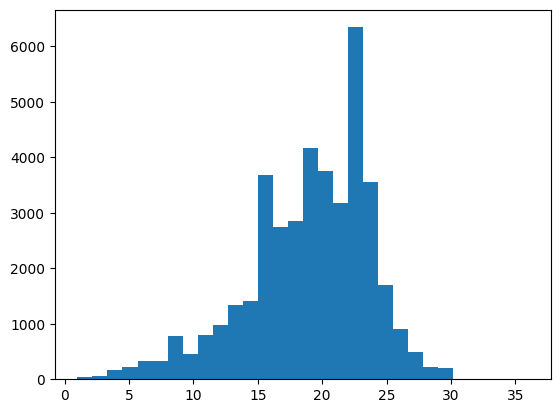

In [184]:
plt.hist(total,bins=30)

In [185]:
max_words = 23

In [186]:
np.average(total)

18.912549771420146

In [187]:
from keras.preprocessing import sequence

In [188]:
X_train = sequence.pad_sequences(X_train,maxlen=max_words)

In [189]:
X_test = sequence.pad_sequences(X_test,maxlen=max_words)

In [190]:
total = [len(text) for text in X_train]

In [191]:
total

[23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,


In [192]:
model = Sequential()

In [193]:
from keras.layers import Embedding, Conv1D, MaxPooling1D

In [194]:
model.add(Embedding(10000,150,input_length=23))

________

In [195]:
model.add(Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))

In [196]:
model.add(MaxPooling1D(pool_size=2))

In [197]:
model.add(Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))

In [198]:
model.add(MaxPooling1D(pool_size=2))

In [199]:
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))

_____

In [200]:
model.add(Dense(3,activation='softmax'))

In [201]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [202]:
history = model.fit(X_train,Y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
255/255 [==============================] - 21s 67ms/step - loss: 0.3517 - val_loss: 0.1138
Epoch 2/10
255/255 [==============================] - 15s 61ms/step - loss: 0.0649 - val_loss: 0.0917
Epoch 3/10
255/255 [==============================] - 16s 62ms/step - loss: 0.0275 - val_loss: 0.1113
Epoch 4/10
255/255 [==============================] - 15s 59ms/step - loss: 0.0169 - val_loss: 0.1190
Epoch 5/10
255/255 [==============================] - 16s 62ms/step - loss: 0.0128 - val_loss: 0.1505
Epoch 6/10
255/255 [==============================] - 16s 62ms/step - loss: 0.0089 - val_loss: 0.1525
Epoch 7/10
255/255 [==============================] - 16s 65ms/step - loss: 0.0062 - val_loss: 0.1585
Epoch 8/10
255/255 [==============================] - 20s 79ms/step - loss: 0.0062 - val_loss: 0.1477
Epoch 9/10
255/255 [==============================] - 16s 64ms/step - loss: 0.0057 - val_loss: 0.1660
Epoch 10/10
255/255 [==============================] - 16s 62ms/step - loss: 0.004

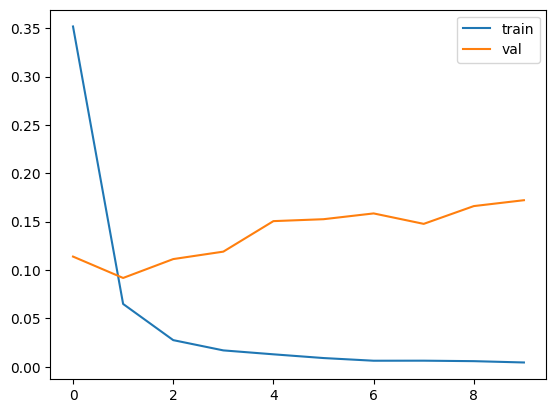

In [204]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])

In [206]:
y_pred = model.predict(X_test)

318/318 [==============================] - 3s 8ms/step


In [209]:
y_pred = y_pred.round()

In [225]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [213]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1183
           1       0.97      0.98      0.97      4464
           2       0.98      0.98      0.98      4525

   micro avg       0.97      0.97      0.97     10172
   macro avg       0.97      0.95      0.96     10172
weighted avg       0.97      0.97      0.97     10172
 samples avg       0.97      0.97      0.97     10172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
cnf = confusion_matrix(np.argmax(list(Y_test.values),axis=1),np.argmax(y_pred,axis=1))

<Axes: >

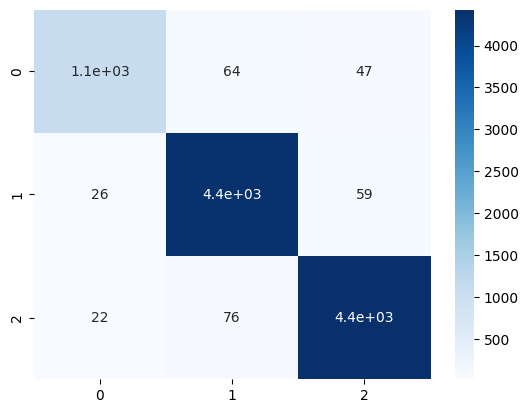

In [224]:
sns.heatmap(cnf,cmap='Blues',annot=True)

In [226]:
# zatoa sto ima povekje od 2 klasi vo f1_score, zadavame average, najcesto 'macro'
# macro gi zema site klasi kako nezavisni i gi gleda sekoja so sekoja
print(f1_score(Y_test,y_pred,average='macro'))

0.9615153476622869
